데이터 다운로드: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv("./data/fraud.csv")
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [4]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

- trans_date_trans_time : 거래 시간
- cc_num : 카드 번호. 고유값이기 때문에 여기서는 id처럼 활용할 수 있습니다.
- merchant : 거래 상점
- category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
- amt : 거래 금액
- first / last : 이름
- gender : 성별
- street / state / zip : 고객 거주지 정보
- lat / long : 고객 주소에 대한 위도 및 경도
- city_pop : 고객이 zipcode에 속하는 인구 수
- job : 직업
- dob : 생년월일
- trans_num : 거래번호
- unix_time : 거래 시간(유닉스 타임스탬프 형식)
- merch_lat / merch_long : 상점 위치에 대한 위도 및 경도
- is_fraud : 사기거래 여부 (종속변수)

In [4]:
# select_dtype을 통해서 자동분류
cate_cols= data.select_dtypes(include=['object'])
num_cols=data.select_dtypes(exclude=['object'])


In [ ]:
for col in cate_cols:
    print(cate_cols[col].value_counts())
    cate_cols[col].value_counts().plot(kind='bar')
    plt.show()

trans_date_trans_time
2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2020-10-05 19:37:49    4
2020-12-13 17:53:47    4
                      ..
2019-01-01 00:41:45    1
2019-01-01 00:42:26    1
2019-01-01 00:43:38    1
2019-01-01 00:44:20    1
2020-12-31 23:50:17    1
Name: count, Length: 1819551, dtype: int64


In [ ]:
for col in num_cols:
    print(num_cols[col].value_counts())
    num_cols[col].value_counts().plot(kind='bar')
    plt.show()

In [ ]:
categorical.describe(include='all')

In [ ]:
for cat_cols in categorical:
    print(cat_cols)
    print(data[cat_cols].value_counts())

In [ ]:
# 긴반복문 버전 object면 범주형으로 append
categorical=[]
numerical=[]
for col in data:
    if data[col].dtype!='object':
        numerical.append(col)
        
    else:
        categorical.append(col)

print(numerical)

In [ ]:
data[numerical]

In [ ]:
data[categorical].describe()

In [ ]:
# 결측값
data.isna().sum()

<Axes: >

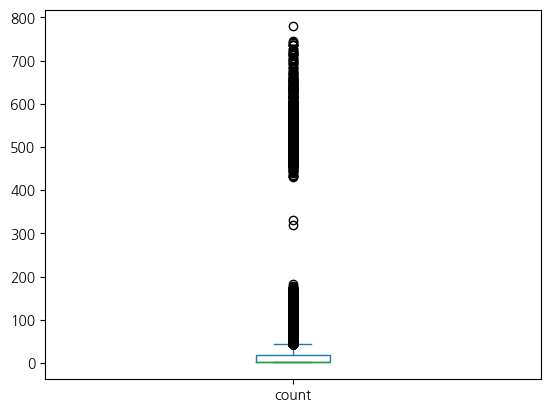

In [5]:
# 이상값
data['amt'].value_counts().plot(kind='box')

In [6]:
# 수치형 데이터의 이상값
data_desc= round(data.describe(),2)
data_desc

# citypop하고 amt가 평균&중앙값 간 간격이 큼

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1.852394e+06,1852394.00,1852394.00,1852394.00
mean,4.173860e+17,70.06,48813.26,38.54,-90.23,88643.67,1.358674e+09,38.54,-90.23,0.01
std,1.309115e+18,159.25,26881.85,5.07,13.75,301487.62,1.819508e+07,5.11,13.76,0.07
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.64,26237.00,34.67,-96.80,741.00,1.343017e+09,34.74,-96.90,0.00
50%,3.521417e+15,47.45,48174.00,39.35,-87.48,2443.00,1.357089e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.10,72042.00,41.94,-80.16,20328.00,1.374581e+09,41.96,-80.25,0.00
max,4.992346e+18,28948.90,99921.00,66.69,-67.95,2906700.00,1.388534e+09,67.51,-66.95,1.00


In [7]:
# 이상값 기준이되는 상한가 Q3(75%) + (1.5 × (Q3 - Q1))
amt_maximum=data_desc.loc['75%','amt'] + (data_desc.loc['75%','amt'] - data_desc.loc['25%','amt'])
amt_maximum

np.float64(156.56)

In [9]:
outliers= data[data['amt']>amt_maximum]
outliers.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0
16,2019-01-01 00:10:49,6011860238257910,fraud_Lebsack and Sons,misc_net,327.00,Lisa,Mendez,F,44259 Beth Station Suite 215,Lahoma,...,36.3850,-98.0727,1078,"Programme researcher, broadcasting/film/video",1952-07-06,991c04803b4d4eeab30d6245a872e3d3,1325376649,36.384092,-99.048472,0
17,2019-01-01 00:10:58,3565423334076143,fraud_Mayert Group,shopping_pos,341.67,Nathan,Thomas,M,4923 Campbell Pines Suite 717,Carlisle,...,38.9763,-87.3667,4081,Energy engineer,1938-03-15,f12cf52be2175703db789a4644c32f25,1325376658,38.674491,-88.305767,0
36,2019-01-01 00:26:22,3598215285024754,fraud_Heidenreich PLC,grocery_pos,207.36,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,f246ac27c09429ff1e385d4683c79c4d,1325377582,40.202538,-73.859212,0


# 거래금액이 많은게 나쁜건가? 이상없는건가? 모르겠엄

In [13]:
# 다른 컬럼과의 연관성 살피기
# amt와 사기여부 연관성을 보려면 
amt_fraud_desc=data[['is_fraud','amt']].groupby('is_fraud').describe()
amt_fraud_desc

amt                                                          \
              count        mean         std   min      25%     50%      75%   
is_fraud                                                                      
0         1842743.0   67.651278  153.548108  1.00    9.610   47.24   82.560   
1            9651.0  530.661412  391.028873  1.06  240.075  390.00  902.365   

                    
               max  
is_fraud            
0         28948.90  
1          1376.04

In [15]:
#클래스별 이상치를 다시 찍어보기
amt_fraud_desc.columns

MultiIndex([('amt', 'count'),
            ('amt',  'mean'),
            ('amt',   'std'),
            ('amt',   'min'),
            ('amt',   '25%'),
            ('amt',   '50%'),
            ('amt',   '75%'),
            ('amt',   'max')],
           )

In [16]:
amt_fraud_desc.loc[0,('amt',   '75%')]

np.float64(82.56)